**After completing EDA, we will go ahead to create features that will be relevant in our classification task.**

Importing Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# set display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# Importing the cleaned dataset
df_clean = pd.read_csv('IFSSA_cleaned_dataset.csv')
df_clean.head()


,agent_collect_note,client_collected,client_list,collect_scheduled_date,confirmed,datetime_from,datetime_to,hamper_confirmation_type,hamper_type,pickup_date,quantity,title,Creation Date_x,Modified Date_x,address,client_status_more_info,contact_frequency,date_reopened,dependents_qty,household,latest_contact_method,preferred_contact_methods,preferred_languages,sex_new,status,Creation Date_y,Modified Date_y,new_age_years,preferred_languages_binned,hamper demand,pickup_month
0,No Note,Unknown,NaN,2023-07-27 00:00:00,Unknown,2023-07-27 00:00:00,2023-07-27 00:00:00,Unknown,1689345897790x875227980928652300,1677-09-21 00:12:43.145224193,1,New food hamper schedule,2023-07-27 15:57:00,2023-07-27 15:57:00,Unknown,No notes,Unknown,Unknown,1.0,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,38,Unknown,NaN,9
1,Pedro's test,yes,1689345689019x623399745786478600,2023-08-22 00:00:00,Unknown,2023-08-22 00:00:00,Unknown,Personal ID,1689345897790x875227980928652300,2023-08-22 10:45:00.000000000,1,Raj (Pedro's whatsapp) New Hamper,2023-08-22 09:59:00,2024-02-19 10:32:00,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",No notes,Weekly,2023-10-04 17:20:00,1.0,yes,WhatsApp,"WhatsApp , SMS",English,Unknown,Active,2023-07-14 11:41:00,2024-08-22 13:21:00,38,English,1.0,8
2,Confirmed pickup.,yes,1694115474357x134699341188431870,2023-09-07 03:00:00,Unknown,2023-09-07 03:00:00,2023-09-07 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-07 17:37:00.000000000,1,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",No notes,Monthly,2023-09-07 18:25:00,6.0,yes,WhatsApp,"WhatsApp , Phone Call",Arabic,Unknown,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,37,Arabic,1.0,9
3,No Note,yes,1694547419532x515953499649605600,2023-09-12 03:00:00,Unknown,2023-09-12 03:00:00,2023-09-12 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-12 17:39:00.000000000,1,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",No notes,Monthly,2023-10-04 17:20:00,5.0,yes,Unknown,"SMS , Phone Call , Email","Arabic , French",Unknown,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,34,"Arabic , French",1.0,9
4,No Note,yes,1694630813849x163939988692795400,2023-09-13 03:00:00,Unknown,2023-09-13 03:00:00,2023-09-13 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-13 16:36:00.000000000,1,food hamper,2023-09-13 16:36:00,2024-02-19 10:32:00,"18120 78 St NW, Edmonton, AB T5Z 0N8, Canada",No notes,Monthly,2023-10-04 17:20:00,2.0,yes,Unknown,"WhatsApp , SMS , Phone Call",Turkish,Unknown,Active,2023-09-13 15:46:00,2024-08-22 12:30:00,31,Turkish,1.0,9


In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1023 entries, 0 to 1022
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   agent_collect_note          1023 non-null   object 
 1   client_collected            1023 non-null   object 
 2   client_list                 1022 non-null   object 
 3   collect_scheduled_date      1023 non-null   object 
 4   confirmed                   1023 non-null   object 
 5   datetime_from               1023 non-null   object 
 6   datetime_to                 1023 non-null   object 
 7   hamper_confirmation_type    1023 non-null   object 
 8   hamper_type                 1023 non-null   object 
 9   pickup_date                 1023 non-null   object 
 10  quantity                    1023 non-null   int64  
 11  title                       1023 non-null   object 
 12  Creation Date_x             1023 non-null   object 
 13  Modified Date_x             1023 

In [ ]:
df_clean['title'].unique()

array(['New food hamper schedule', "Raj (Pedro's whatsapp) New Hamper",
       "Abdulhalim's Hamper", "Sadek's Hamper", 'food hamper',
       'Food Hamper', 'Food Hamper ', 'Food hamper', 'Food',
       "Amira's Hamper", "Mohammed Albarayka's Food Hamper", 'food',
       'Food Hamper pickup', 'food Hamper pick up', 'food ',
       'Hamper pick up', 'Hamper pickup ', 'Hamper pickup',
       'Hamper pick up ', 'Hamper pik up ', 'Food FHamper', 'Food Hmaper',
       'hamper pickup', 'food pick up ', 'Hamper pickup  ',
       'Food Hamper pickup ', 'food pickup ', 'food pickup',
       'Food hamper ', 'food pick up', 'foof hamper', 'hamper pickup ',
       'Hamper pick ', 'Food Hamper pick up', 'Food hamper pickup ',
       'Food hamper pickup', 'Food  Hamper', 'food Hamper', 'Food Humper',
       'Food Hanper', 'hamper ', 'food hamper ', 'hamper pick up ',
       'hamper pick up', 'Fatuma', 'food Hamper ', 'Food hamper delivery',
       'food hamper delivery', 'food hamper delivery ',
   

In [ ]:
df_clean.head()

,agent_collect_note,client_collected,client_list,collect_scheduled_date,confirmed,datetime_from,datetime_to,hamper_confirmation_type,hamper_type,pickup_date,quantity,title,Creation Date_x,Modified Date_x,address,client_status_more_info,contact_frequency,date_reopened,dependents_qty,household,latest_contact_method,preferred_contact_methods,preferred_languages,sex_new,status,Creation Date_y,Modified Date_y,new_age_years,preferred_languages_binned,hamper demand,pickup_month
0,Pedro's test,yes,1689345689019x623399745786478600,2023-08-22 00:00:00,Unknown,2023-08-22 00:00:00,NaN,Personal ID,1689345897790x875227980928652300,2023-08-22 10:45:00,1,Raj (Pedro's whatsapp) New Hamper,2023-08-22 09:59:00,2024-02-19 10:32:00,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",No notes,Weekly,2023-10-04 17:20:00,1.0,yes,WhatsApp,"WhatsApp , SMS",English,Unknown,Active,2023-07-14 11:41:00,2024-08-22 13:21:00,38,English,1,8
1,Confirmed pickup.,yes,1694115474357x134699341188431870,2023-09-07 03:00:00,Unknown,2023-09-07 03:00:00,2023-09-07 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-07 17:37:00,1,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",No notes,Monthly,2023-09-07 18:25:00,6.0,yes,WhatsApp,"WhatsApp , Phone Call",Arabic,Unknown,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,37,Arabic,1,9
2,No Note,yes,1694547419532x515953499649605600,2023-09-12 03:00:00,Unknown,2023-09-12 03:00:00,2023-09-12 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-12 17:39:00,1,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",No notes,Monthly,2023-10-04 17:20:00,5.0,yes,Unknown,"SMS , Phone Call , Email","Arabic , French",Unknown,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,34,"Arabic , French",1,9
3,No Note,yes,1694630813849x163939988692795400,2023-09-13 03:00:00,Unknown,2023-09-13 03:00:00,2023-09-13 03:00:00,Personal ID,1689345897790x875227980928652300,2023-09-13 16:36:00,1,food hamper,2023-09-13 16:36:00,2024-02-19 10:32:00,"18120 78 St NW, Edmonton, AB T5Z 0N8, Canada",No notes,Monthly,2023-10-04 17:20:00,2.0,yes,Unknown,"WhatsApp , SMS , Phone Call",Turkish,Unknown,Active,2023-09-13 15:46:00,2024-08-22 12:30:00,31,Other,1,9
4,No Note,yes,1694706859040x976185037439631400,2023-09-14 03:00:00,Unknown,2023-09-14 03:00:00,2023-09-14 03:00:00,Personal ID,1689345897790x875227980928652300,2023-10-18 14:18:00,1,Food Hamper,2023-09-14 13:35:00,2024-02-19 10:32:00,"4204 139 Ave NW, Edmonton, AB T5Y 2Z7, Canada",needs reassessment,Monthly,2023-10-04 17:20:00,3.0,yes,Unknown,"WhatsApp , Phone Call","English , Arabic",Unknown,Closed,2023-09-14 12:54:00,2024-08-22 12:37:00,42,"English , Arabic",1,10


In [ ]:
# Convert date columns to datetime format
df_clean['pickup_date'] = pd.to_datetime(df_clean['pickup_date'], errors='coerce')
df_clean['collect_scheduled_date'] = pd.to_datetime(df_clean['collect_scheduled_date'], errors='coerce')
df_clean['datetime_from'] = pd.to_datetime(df_clean['datetime_from'], errors='coerce')
df_clean['datetime_to'] = pd.to_datetime(df_clean['datetime_to'], errors='coerce')
df_clean['date_reopened'] = pd.to_datetime(df_clean['date_reopened'], errors='coerce')
df_clean['Modified Date_y'] = pd.to_datetime(df_clean['Modified Date_y'], errors='coerce')
df_clean['Creation Date_y'] = pd.to_datetime(df_clean['Creation Date_y'], errors='coerce')
df_clean['Modified Date_x'] = pd.to_datetime(df_clean['Modified Date_x'], errors='coerce')
df_clean['Creation Date_x'] = pd.to_datetime(df_clean['Creation Date_x'], errors='coerce')

In [ ]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_collect_note          892 non-null    object        
 1   client_collected            892 non-null    object        
 2   client_list                 892 non-null    object        
 3   collect_scheduled_date      892 non-null    datetime64[ns]
 4   confirmed                   892 non-null    object        
 5   datetime_from               892 non-null    datetime64[ns]
 6   datetime_to                 890 non-null    datetime64[ns]
 7   hamper_confirmation_type    892 non-null    object        
 8   hamper_type                 892 non-null    object        
 9   pickup_date                 892 non-null    datetime64[ns]
 10  quantity                    892 non-null    int64         
 11  title                       892 non-null    object        

In [ ]:
#Import Holiday Dataset
df_holidays = pd.read_csv('Holiday_Data.csv')
df_holidays.head()

,Holidays,Dates
0,New Year's Day,2023-01-01
1,Alberta Family Day,2023-02-20
2,Good Friday,2023-04-07
3,Easter Monday,2023-04-10
4,Mother's Day,2023-05-14


In [ ]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Holidays  29 non-null     object
 1   Dates     29 non-null     object
dtypes: object(2)
memory usage: 596.0+ bytes


In [ ]:
#convert dates column to datetime
df_holidays['Dates'] = pd.to_datetime(df_holidays['Dates'])

In [ ]:
df_holidays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Holidays  29 non-null     object        
 1   Dates     29 non-null     datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 596.0+ bytes


In [ ]:


# Extract the month and year from 'pickup_date' and 'Dates' to merge by month
df_clean['pickup_month'] = df_clean['pickup_date'].dt.to_period('M')
df_holidays['holiday_month'] = df_holidays['Dates'].dt.to_period('M')

# Merge based on the month (and year) of the pickup date and holiday date
df_merged = pd.merge(df_clean, df_holidays, left_on='pickup_month', right_on='holiday_month', how='left')

# Check the merge result
df_merged.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_collect_note          1070 non-null   object        
 1   client_collected            1070 non-null   object        
 2   client_list                 1070 non-null   object        
 3   collect_scheduled_date      1070 non-null   datetime64[ns]
 4   confirmed                   1070 non-null   object        
 5   datetime_from               1070 non-null   datetime64[ns]
 6   datetime_to                 1068 non-null   datetime64[ns]
 7   hamper_confirmation_type    1070 non-null   object        
 8   hamper_type                 1070 non-null   object        
 9   pickup_date                 1070 non-null   datetime64[ns]
 10  quantity                    1070 non-null   int64         
 11  title                       1070 non-null   object      

# **Block 1: Understanding Your Problem & Data**

For our problem: "predicting whether a client will return or not within 3 months", we identified a number of internal and external features that will be crucial for building an accurate model as discusssed below:

**Internal Features**

**pickup_date:**

This represents the date when the client scheduled the hamper pickup. It is critical for understanding the recency of client interaction, which plays a key role in predicting whether the client will return in the future.

**quantity:**

The number of hampers scheduled for pickup. This can help capture the volume of interaction, which could be a factor in whether a client will return or not.

**dependents_qty:**

This feature indicates the number of dependents the client has. It is important because a client's household size may correlate with future demand for hampers, as larger households may have more frequent needs.

**household:**

The identifier for the household associated with a client. By tracking this, we can analyze repeat behavior at the household level, as some households may have a higher likelihood of repeat visits than others.

**contact_frequency:**

The frequency at which the client is contacted. It provides insight into how engaged the client is with the service, which can be a strong indicator of retention probability.

**pickup_month:**

The month during which the pickup occurred. This is useful for capturing seasonal trends and understanding whether demand varies by month.

**External Features**

**Holiday Data:**

Holidays play a significant role in determining client behavior. By marking whether the pickup date falls around a public holiday or special event, I can track whether holidays (e.g., Ramadan, Christmas) lead to a change in client behavior. For example, clients might schedule more pickups before or after holidays.

#  **Block 2: Creating Time-Based Features**
## Time-Based Features for Client Retention Prediction

**Week of the Year (pickup_week)**:

Description: This feature captures the week number of the year when the pickup occurs.

Relevance: There might be weekly demand fluctuations (e.g., increased demand at the start of a month). By capturing the week of the year, we can observe if certain weeks tend to have higher or lower demand.

In [ ]:
df_merged['pickup_week'] = df_merged['pickup_date'].dt.isocalendar().week

Holiday Flags (is_holiday):

Description: This binary feature flags whether the pickup occurred on or near a holiday.

Relevance: Holidays often impact client behavior, clients may be more or less likely to return during holidays. For instance, during festive seasons like Christmas or Ramadan, the demand for pickups may increase.

In [ ]:
df_merged['is_holiday'] = df_merged['pickup_date'].isin(df_holidays['Dates']).astype(int)


**Scheduled vs. Actual Pickups (scheduled_vs_actual):**

Description: This feature compares the scheduled pickup date (collect_scheduled_date) with the actual pickup date (pickup_date). The difference between these dates may reflect the flexibility or timeliness of the client.

Relevance: If a client tends to reschedule or delay their pickups, this could indicate that they have lower engagement with the service. Conversely, clients who adhere closely to their scheduled pickups may be more likely to remain loyal.

In [ ]:
#filter out extreme dates in one step
df_merged = df_merged[(df_merged['pickup_date'] >= '2020-01-01') &
                       (df_merged['collect_scheduled_date'] >= '2020-01-01')]

# Compute difference
df_merged['scheduled_vs_actual'] = (df_merged['pickup_date'] - df_merged['collect_scheduled_date']).dt.days




**Lagged Features for Past Behavior:**
Lagged features are essential for capturing past behavior and trends.


Description: Lagged features track the past behavior of the client

Relevance: Clients who recently interacted with the service are more likely to return. Tracking the number of pickups in the past few weeks or months gives a sense of recency and frequency of engagement.


Hamper demand Lag

In [ ]:
def create_lagged_features(df, feature_column, lags=[7, 14, 30]):
  """
  Creates lagged features for a given column.

  Args:
    df: The DataFrame.
    feature_column: The column to create lags for.
    lags: A list of lag periods (in days).

  Returns:
    The DataFrame with lagged features added.
  """
  for lag in lags:
    df[f'{feature_column}_lag_{lag}'] = df.groupby('household')[feature_column].shift(lag).fillna(0)
  return df

df_merged = create_lagged_features(df_merged, 'hamper demand', lags=[7, 14, 30])

In [ ]:
df_merged.sort_values(by=['household', 'pickup_date'], inplace=True)
df_merged['pickup_count_last_7_days'] = df_merged.groupby('household').rolling('7D', on='pickup_date')['pickup_date'].count().values
# The values attribute extracts the raw NumPy array, avoiding the index alignment issue

In [ ]:
df_merged['pickup_count_last_14_days'] = df_merged.groupby('household').rolling('14D', on='pickup_date')['pickup_date'].count().values


In [ ]:
df_merged['pickup_count_last_30_days'] = df_merged.groupby('household').rolling('30D', on='pickup_date')['pickup_date'].count().values

In [ ]:
df_merged['pickup_count_last_90_days'] = df_merged.groupby('household').rolling('90D', on='pickup_date')['pickup_date'].count().values

In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 118 to 1069
Data columns (total 44 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_collect_note          1070 non-null   object        
 1   client_collected            1070 non-null   object        
 2   client_list                 1070 non-null   object        
 3   collect_scheduled_date      1070 non-null   datetime64[ns]
 4   confirmed                   1070 non-null   object        
 5   datetime_from               1070 non-null   datetime64[ns]
 6   datetime_to                 1068 non-null   datetime64[ns]
 7   hamper_confirmation_type    1070 non-null   object        
 8   hamper_type                 1070 non-null   object        
 9   pickup_date                 1070 non-null   datetime64[ns]
 10  quantity                    1070 non-null   int64         
 11  title                       1070 non-null   object        


**Time Since Last Pickup (time_since_last_pickup):**

This feature measures the number of days since the client's last pickup. Clients who haven't picked up a hamper in a while might be at higher risk of churn, while clients with frequent pickups could be more likely to return.


In [ ]:
# Compute days since last pickup per household
df_merged['time_since_last_pickup'] = (df_merged['pickup_date'] - df_merged.groupby('household')['pickup_date'].shift(1)).dt.days


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 118 to 1069
Data columns (total 45 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   agent_collect_note          1070 non-null   object        
 1   client_collected            1070 non-null   object        
 2   client_list                 1070 non-null   object        
 3   collect_scheduled_date      1070 non-null   datetime64[ns]
 4   confirmed                   1070 non-null   object        
 5   datetime_from               1070 non-null   datetime64[ns]
 6   datetime_to                 1068 non-null   datetime64[ns]
 7   hamper_confirmation_type    1070 non-null   object        
 8   hamper_type                 1070 non-null   object        
 9   pickup_date                 1070 non-null   datetime64[ns]
 10  quantity                    1070 non-null   int64         
 11  title                       1070 non-null   object        


# **Block 3: Client/Household-Based Features**

**Time Since First Visit (time_since_first_visit):**

Description: This feature captures the time that has passed since the first visit or first pickup by the client.

Relevance: Clients who have been engaged with the service for a long period may exhibit different retention behaviors compared to new clients. A longer engagement might increase the likelihood of a client returning due to habit formation or higher lifetime value.

In [ ]:
df_merged['first_pickup'] = df_merged.groupby('household')['pickup_date'].transform('min')
df_merged['time_since_first_visit'] = (df_merged['pickup_date'] - df_merged['first_pickup']).dt.days


**Average Time Between Visits (avg_time_between_visits):**

Description: This feature calculates the average number of days between two consecutive pickups for a client.

Relevance: Clients who have a shorter time between visits may have higher engagement, which could increase their likelihood of returning. Clients with longer gaps between visits may be at risk of churn.

In [ ]:
df_merged['avg_time_between_visits'] = df_merged.groupby('household')['pickup_date'] \
    .transform(lambda x: x.diff().mean()).dt.days


**Total Number of Dependents Over Time**

Relevance: Changes in a client's number of dependents could signal changes in their needs and, consequently, their demand for services.



In [ ]:
# Using the 'dependents_qty' column and it changes over time
df_merged['dependents_qty'] = pd.to_numeric(df_merged['dependents_qty'], errors='coerce')
df_merged = df_merged.sort_values(by=['household', 'pickup_date']).reset_index(drop=True)  # Sort and reset index

# Set 'pickup_date' as the index before applying rolling
df_merged = df_merged.set_index('pickup_date')

df_merged['total_dependents_3_months'] = (
    df_merged.groupby('household')['dependents_qty']
    .rolling('90D').sum()  # or .mean() if appropriate
    .reset_index(level=0, drop=True)
)

# Reset the index back to the original if needed
df_merged = df_merged.reset_index()

**Visit Patterns**

Relevance: Regularity and frequency of visits are strong indicators of client behavior and can predict future demand.


In [ ]:
df_merged = df_merged.set_index('pickup_date')
df_merged['weekly_visits'] = df_merged.groupby('household')['client_list'].rolling('7D').count().reset_index(level=0, drop=True)
df_merged['monthly_visits'] = df_merged.groupby('household')['client_list'].rolling('30D').count().reset_index(level=0, drop=True)
df_merged = df_merged.reset_index()

## Creating the target feature:
Client_return_with_3_Months

In [ ]:
import pandas as pd


# Soring the data by client_id and pickup_date to ensure chronological order
df_merged = df_merged.sort_values(by=['client_list', 'pickup_date'])

# Create an empty target column
df_merged['client_return_within_3_months'] = 0

# Loop through each client group
for client_id, group in df_merged.groupby('client_list'):
    # Get the client group sorted by pickup_date
    for i in range(len(group) - 1):
        current_pickup_date = group.iloc[i]['pickup_date']
        next_pickup_date = group.iloc[i + 1]['pickup_date']

        # Check if the next pickup is within 3 months
        if (next_pickup_date - current_pickup_date).days <= 90:
            df_merged.at[group.index[i], 'client_return_within_3_months'] = 1

# Check the result
df_merged[['client_list', 'pickup_date', 'client_return_within_3_months']].head()


,client_list,pickup_date,client_return_within_3_months
985,1669658091582x874637848970788900,2024-04-19 00:22:00,0
983,1686780032991x462370984017264640,2024-04-09 17:35:00,0
27,1689345689019x623399745786478600,2023-08-22 10:45:00,0
28,1694115474357x134699341188431870,2023-09-07 17:37:00,0
29,1694547419532x515953499649605600,2023-09-12 17:39:00,0


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1070 entries, 985 to 1069
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   pickup_date                    1070 non-null   datetime64[ns]
 1   agent_collect_note             1070 non-null   object        
 2   client_collected               1070 non-null   object        
 3   client_list                    1070 non-null   object        
 4   collect_scheduled_date         1070 non-null   datetime64[ns]
 5   confirmed                      1070 non-null   object        
 6   datetime_from                  1070 non-null   datetime64[ns]
 7   datetime_to                    1068 non-null   datetime64[ns]
 8   hamper_confirmation_type       1070 non-null   object        
 9   hamper_type                    1070 non-null   object        
 10  quantity                       1070 non-null   int64         
 11  title               

# **Block 4: Geospatial Features**


Neighborhood-Level Demand:

Description: This feature would aggregate demand data (e.g., number of hamper pickups) by neighborhood or postal code to understand demand patterns at a regional level.
Relevance: Certain neighborhoods might have higher or lower levels of demand, which could influence client retention. For example, urban areas may have more frequent pickups due to higher population density, while rural areas might have lower demand.

In [ ]:
# Expanded neighborhood map for Edmonton postal codes
neighborhood_map = {
    # Central McDougall & Downtown area
    "T5H 2Z8": "Central McDougall",  # 10545 108 St NW
    "T5H 0X9": "Central McDougall",
    "T5J 0Z9": "Downtown",
    "T5J 0R9": "Downtown",
    "T5K 1X8": "Oliver",
    "T5K 1M7": "Oliver",

    # Kilkenny & Nearby
    "T5C 1E8": "Kilkenny",          # 14604 77 St NW
    "T5C 3C3": "Northmount",

    # Callaghan & Southwest
    "T6W 0G6": "Callaghan",         # 403 Callaghan Ct SW
    "T6W 1A5": "Windermere",
    "T6W 2P3": "Heritage Valley",

    # Northeast (Fraser, Crystallina Nera, etc.)
    "T5Z 0N8": "Crystallina Nera",   # 18120 78 St NW
    "T5Y 2Z7": "Fraser",             # 4204 139 Ave NW
    "T5Z 3W5": "Schonsee",

    # North (Dunluce, etc.)
    "T5X 3R3": "Dunluce",            # 164 Ave NW
    "T5X 4P2": "Lorelei",

    # Fallback for missing postal codes
    None: "Unknown"
}

# Import regular expressions module
import re

# Extract postal codes from the 'address' column
# The regex pattern allows for an optional space (e.g., "T5H2Z8" or "T5H 2Z8")
df_merged['postal_code'] = df_merged['address'].str.extract(r'([A-Z]\d[A-Z]\s?\d[A-Z]\d)')

# Map postal codes to neighborhoods using the neighborhood_map
df_merged['neighborhood'] = df_merged['postal_code'].map(neighborhood_map)
# Expanded neighborhood map for Edmonton postal codes
neighborhood_map = {
    # Central McDougall & Downtown area
    "T5H 2Z8": "Central McDougall",  # 10545 108 St NW
    "T5H 0X9": "Central McDougall",
    "T5J 0Z9": "Downtown",
    "T5J 0R9": "Downtown",
    "T5K 1X8": "Oliver",
    "T5K 1M7": "Oliver",

    # Kilkenny & Nearby
    "T5C 1E8": "Kilkenny",          # 14604 77 St NW
    "T5C 3C3": "Northmount",

    # Callaghan & Southwest
    "T6W 0G6": "Callaghan",         # 403 Callaghan Ct SW
    "T6W 1A5": "Windermere",
    "T6W 2P3": "Heritage Valley",

    # Northeast (Fraser, Crystallina Nera, etc.)
    "T5Z 0N8": "Crystallina Nera",   # 18120 78 St NW
    "T5Y 2Z7": "Fraser",             # 4204 139 Ave NW
    "T5Z 3W5": "Schonsee",

    # North (Dunluce, etc.)
    "T5X 3R3": "Dunluce",            # 164 Ave NW
    "T5X 4P2": "Lorelei",

    # Fallback for missing postal codes
    None: "Unknown"
}

# Import regular expressions module
import re

# Extract postal codes from the 'address' column
# The regex pattern allows for an optional space (e.g., "T5H2Z8" or "T5H 2Z8")
df_merged['postal_code'] = df_merged['address'].str.extract(r'([A-Z]\d[A-Z]\s?\d[A-Z]\d)')

# Map postal codes to neighborhoods using the neighborhood_map
df_merged['neighborhood'] = df_merged['postal_code'].map(neighborhood_map)

# For any postal codes not found in the map, fill with 'Unknown'
df_merged['neighborhood'].fillna("Unknown", inplace=True)

In [ ]:
# Expanded neighborhood map for Edmonton postal codes
neighborhood_map = {
    # Central Edmonton
    "T5H 2Z8": "Central McDougall",  # 10545 108 St NW
    "T5H 0X9": "Central McDougall",
    "T5J 0Z9": "Downtown",
    "T5J 0R9": "Downtown",
    "T5K 1X8": "Oliver",
    "T5K 1M7": "Oliver",
    "T5G 0A1": "Queen Mary Park",
    "T5G 0B1": "Prince Rupert",
    "T5G 0C1": "Westmount",
    "T5G 0E1": "Inglewood",
    "T5G 0G1": "Glenora",
    "T5G 0H1": "Crestwood",
    "T5G 0J1": "Parkview",
    "T5G 0K1": "Grovenor",
    "T5G 0L1": "Laurier Heights",
    "T5G 0M1": "Rio Terrace",
    "T5G 0N1": "Lynnwood",
    "T5G 0P1": "Greenfield",
    "T5G 0R1": "Pleasantview",
    "T5G 0S1": "Malmo Plains",
    "T5G 0T1": "Blue Quill",
    "T5G 0V1": "Sweetgrass",
    "T5G 0W1": "Bearspaw",
    "T5G 0X1": "Blackmud Creek",
    "T5G 0Y1": "Twin Brooks",
    "T5G 0Z1": "Rutherford",
    "T5G 1A1": "Summerside",
    "T5G 1B1": "Ellerslie",
    "T5G 1C1": "Allard",
    "T5G 1D1": "Chappelle",
    "T5G 1E1": "Heritage Valley",
    "T5G 1F1": "Windermere",
    "T5G 1G1": "Terwillegar Towne",
    "T5G 1H1": "Magrath",
    "T5G 1J1": "The Hamptons",
    "T5G 1K1": "Glenridding Heights",
    "T5G 1L1": "Cavanagh",
    "T5G 1M1": "Walker",
    "T5G 1N1": "Keswick",
    "T5G 1P1": "Ambleside",
    "T5G 1R1": "Rosenthal",
    "T5G 1S1": "Granville",
    "T5G 1T1": "Lymburn",
    "T5G 1V1": "West Jasper Place",
    "T5G 1W1": "Britannia Youngstown",
    "T5G 1X1": "Canora",
    "T5G 1Y1": "Westridge",

    # North Edmonton
    "T5X 3R3": "Dunluce",  # 164 Ave NW
    "T5X 4P2": "Lorelei",
    "T5Y 2Z7": "Fraser",  # 4204 139 Ave NW
    "T5Z 0N8": "Crystallina Nera",  # 18120 78 St NW
    "T5Z 3W5": "Schonsee",
    "T5A 0A1": "Beverly Heights",
    "T5A 0B1": "Abbotsfield",
    "T5A 0C1": "Balwin",
    "T5A 0D1": "Belvedere",
    "T5A 0E1": "Clareview",
    "T5A 0F1": "Collingwood",
    "T5A 0G1": "Delton",
    "T5A 0H1": "Eastwood",
    "T5A 0J1": "Elmwood Park",
    "T5A 0K1": "Griesbach",
    "T5A 0L1": "Highlands",
    "T5A 0M1": "Hollick Kenyon",

    # South Edmonton
    "T6H 1A1": "Belgravia",  # 10807 47 Ave NW
    "T6G 1R1": "Garneau",  # 10702 51 Ave NW
    "T6E 1A1": "Bonnie Doon",
    "T6C 1A1": "Strathcona",
    "T6J 1A1": "Terwillegar Towne",
    "T6R 1A1": "Riverbend",
    "T6L 1A1": "Mill Woods",
    "T6K 1A1": "Allard",
    "T6N 1A1": "The Hamptons",
    "T6M 1A1": "Magrath",
    "T6P 1A1": "Ellerslie",
    "T6V 1A1": "Chappelle",
    "T6X 1A1": "Edmonton South",
    "T6Y 1A1": "Summerside",
    "T6A 1A1": "Abbotsfield",
    "T6B 1A1": "Beverly",

    # West Edmonton
    "T5T 1A1": "Callingwood",
    "T5T 1B1": "West Edmonton",
    "T5T 1C1": "La Perle",
    "T5T 1D1": "Jamieson Place",
    "T5T 1E1": "Aldergrove",
    "T5T 1F1": "Webber Greens",
    "T5T 1G1": "Lewis Farms",
    "T5T 1H1": "Secord",
    "T5T 1J1": "Hawkstone",
    "T5T 1K1": "Palisades",
    "T5T 1L1": "Granville",
    "T5T 1M1": "Lymburn",
    "T5T 1N1": "West Jasper Place",
    "T5T 1P1": "Britannia Youngstown",
    "T5T 1R1": "Canora",
    "T5T 1S1": "Westridge",

    # Additional Postal Codes from Provided Addresses
    "T5C 1E8": "Kilkenny",  # 14604 77 St NW
    "T5C 3C3": "Northmount",
    "T6W 0G6": "Callaghan",  # 403 Callaghan Ct SW
    "T6W 1A5": "Windermere",
    "T6W 2P3": "Heritage Valley",
    "T5Z 0L4": "Crystallina Nera",  # 18124 78 St NW
    "T5E 2T2": "Abbotsfield",  # 12840 83 St NW
    "T5E 2W3": "Abbotsfield",  # 12845 83 St NW
    "T6J": "Terwillegar Towne",  # 10815 16 Ave NW #203
    "T5X 2P9": "Dunluce",  # 16206 109 St NW
    "T5X 2J3": "Dunluce",  # 16846 109 St NW
    "T5E 2W4": "Abbotsfield",  # 13030 83 St NW
    "T5E 3M6": "Abbotsfield",  # 13212 90 St NW
    "T5B 4K1": "Eastwood",  # 7319 Yellowhead Trail
    "T5H 2X8": "Central McDougall",  # 10638 106 St
    "T5C 3H8": "Northmount",  # 13805 75 Street NW
    "T6E 2T3": "Bonnie Doon",  # 9904 90 Ave NW
    "T6M 1B4": "Magrath",  # 5772 172 St NW
    "T6K 1R7": "Lymburn",  # 3852 78 St NW
    "T5H 2W4": "Central McDougall",  # 10725 104 St NW #109
    "T6H 5J1": "Belgravia",  # 10807 47 Ave NW
    "T6H 0L2": "Belgravia",  # 10702 51 Ave NW
    "T5C 0R7": "Northmount",  # 14540 72 St NW #468d
    "T5A 3S9": "Beverly Heights",  # 4505 137 Ave NW Unit 106
    "T5C 0B2": "Northmount",  # 13225 66 St NW
    "T5Z 3H1": "Schonsee",  # 6608 158 Ave NW
    "T5T 3S5": "Callingwood",  # 17307 69 Ave NW
    "T5Z 3H4": "Schonsee",  # 9132 166 Ave NW
    "T5X 2G6": "Dunluce",  # 10125 164 Ave NW
    "T6K 3K2": "Lymburn",  # 7804 33 Ave NW
    "T5H 2Y9": "Central McDougall",  # 10717 107 St NW #102
    "T5C 3C4": "Northmount",  # 133 Londonderry Square NW
    "T5T 3B6": "Callingwood",  # 6230 180 St NW
    "T5R 4K5": "Terwillegar Towne",  # 15503 87 Ave NW
    "T5T 2K1": "Callingwood",  # 17135 63 Ave NW #102l
    "T5C 3C9": "Northmount",  # 120 Village Acres NW #94
    "T6E 2X2": "Bonnie Doon",  # 3640 85 St NW
    "T5Z 3R8": "Schonsee",  # 7532 162 Ave NW
    "T5A 1L1": "Beverly Heights",  # 6417 144 Ave NW
    "T6K 2L6": "Lymburn",  # Edmonton, AB T6K 2L6
    "T5A": "Beverly Heights",  # 137 Ave NW
    "T5C 0B2": "Northmount",  # 13215 66 St NW Unit 10
    "T6J 5S6": "Terwillegar Towne",  # 2421 104 St NW #609d
    "T5G 2B7": "Abbotsfield",  # 11820 101 St NW Unit 107
    "T5A 3M9": "Beverly Heights",  # 517 Hermitage Rd NW
    "T5A 4M1": "Beverly Heights",  # 425 Horner Rd NW
    "T5T 3S5": "Callingwood",  # 17307 69 Ave NW #312
    "T5E 5V5": "Abbotsfield",  # 14519 92 St NW Unit 302
    "T5J 0G8": "Downtown",  # City Square Tower, 10020 103 Ave NW #1416
    "T6W 1X6": "Callaghan",  # 1680 Melrose Pl SW
    "T6K 3X6": "Lymburn",  # 6919 31 Ave NW
    "T6K 3E8": "Lymburn",  # 8404 42a Ave NW
    "T5T 1Y1": "Callingwood",  # 9419 182 St NW
    "T6W 3R4": "Callaghan",  # 8539 Cushing Pl SW
    "T5H 3B8": "Central McDougall",  # 10725 109 St NW #114
    "T5P 4H4": "Magrath",  # 10234 167 St NW #102
    "T5X 3R3": "Dunluce",  # 10119 164 Ave NW
    "T5T 1M5": "Callingwood",  # 18331 87 Ave NW #22d
    "T5Z 0A6": "Schonsee",  # 17920 89 St NW
    "T5T 2E9": "Callingwood",  # 18015 76 Ave NW
    "T5A 2H5": "Beverly Heights",  # 5715 136 Ave NW #307
    "T6J 2J2": "Terwillegar Towne",  # 10515 38 Ave NW #1
    "T5T 6B9": "Callingwood",  # 9620 174 St NW #402
    "T5G 2B6": "Abbotsfield",  # 11831 101 St NW #403
    "T5H 2V7": "Central McDougall",  # 10735 103 St NW #204
    "T5G 2G3": "Abbotsfield",  # 11830 101 St NW
    "T6V 0B1": "Heritage Valley",  # 13111 140 Ave NW #209
    "T5T 1M2": "Callingwood",  # Edmonton, AB T5T 1M2
    "T5C 3C9": "Northmount",  # 127 Village Acres NW
    "T5T 4C4": "Callingwood",  # 1720 Garnett Point NW Unit 42
    "T5H 3A3": "Central McDougall",  # 10720 108 St NW Unit 301
    "T5L 4T7": "Abbotsfield",  # 12611 128 Ave NW
    "T5T 3K5": "Callingwood",  # 18405 97a Ave NW
    "T5A 4M3": "Beverly Heights",  # 1102 Hermitage Rd NW #008
    "T5A 1X4": "Beverly Heights",  # 226 Creston Pl NW
    "T5T 3W7": "Callingwood",  # 17107 71 Ave NW
    "T5A 4A7": "Beverly Heights",  # 4807 137 Ave NW a134
    "T6K 0P4": "Lymburn",  # 535 Millbourne Rd E Northwest
    "T6L 5V9": "Mill Woods",  # Edmonton, AB T6L 5V9
    "T5L": "Abbotsfield",  # 13464 140 St NW #096
    "T5L 1Y1": "Abbotsfield",  # 14015 137 Ave NW #215
    "T5L 2E3": "Abbotsfield",  # 13318 140 St NW
    "T6L 0B3": "Mill Woods",  # 1671 Jamha Rd NW #213
    "T5T 2K1": "Callingwood",  # 17135 63 Ave NW
    "T6J 4K9": "Terwillegar Towne",  # 11333 31a Ave NW
    "T5H 0H4": "Central McDougall",  # 9330 103a Ave NW #2
    "T5G 2N7": "Abbotsfield",  # 12122 105 St
    "T5B 2N4": "Eastwood",  # 11707 80 St NW Unit 5
    "T6X 0Y2": "Callaghan",  # 667 Watt Blvd SW #312
    "T5A 3J7": "Beverly Heights",  # 3947 134 Ave NW
    "T5C 0R8": "Northmount",  # 14923 72 St NW #116
    "T5C 3C9": "Northmount",  # 127 Village Acres NW #138
    "T5C 3C9": "Northmount",  # 116 Village Acres NW #85
    "T5A 3J7": "Beverly Heights",  # 3933 134 Ave NW
    "T5H 0M1": "Central McDougall",  # 9023 105A Ave #106
    "T5A 0W9": "Beverly Heights",  # 13323 63 St NW
    "T5E 5P8": "Abbotsfield",  # 10505 Lauder Ave NW #17
    "T5E 4C7": "Abbotsfield",  # 13439 97 St NW Unit 607
    "T5C 0R8": "Northmount",
    "T5C 3C9": "Northmount",
    "T5A 3J7": "Beverly Heights",
    "T5H 0M1": "Central McDougall",
    "T5A 0W9": "Beverly Heights",
    "T5E 5P8": "Abbotsfield",
    "T5E 4C7": "Abbotsfield",
    "T5G 0R2": "Abbotsfield",
    "T5E 1R9": "Abbotsfield",
    "T5L 1Y1": "Abbotsfield",
    "T5R 5M1": "Terwillegar Towne",
    "T6K 3K2": "Lymburn",
    "T5P 4C8": "Magrath",
    "T5Y 1H9": "Fraser",
    "T5E 5C1": "Abbotsfield",
    "T5X 4W9": "Dunluce",
    "T6L 5L6": "Mill Woods",
    "T5Y 0H1": "Fraser",
    "T5E 5V8": "Abbotsfield",
    "T6E 1X9": "Bonnie Doon",
    "T5E 5N4": "Abbotsfield",
    "T6K 3Z2": "Lymburn",
    "T6J 2N8": "Terwillegar Towne",
    "T5C 2V2": "Northmount",
    "T5A 1R9": "Beverly Heights",
    "T5W 4S2": "Unknown",
    "T6K 1T9": "Lymburn",
    "T5A 4A6": "Beverly Heights",
    "T5A 2H3": "Beverly Heights",
    "T6J 5R3": "Terwillegar Towne",
    "T5Y 0L3": "Fraser",
    "T5T 5X7": "Callingwood",
    "T5R 2W7": "Terwillegar Towne",
    "T5C 0B2": "Northmount",
    "T5X 5B5": "Dunluce",
    "T5E 0Z7": "Abbotsfield",
    "T5C 3C9": "Northmount",
    "T5B 0T6": "Eastwood",
    "T5X 5L3": "Dunluce",
    "T5X 5G1": "Dunluce",
    "T5A 3L9": "Beverly Heights",
    "T5A 4T2": "Beverly Heights",
    "T5E 1Y6": "Abbotsfield",
    "T6C 3Y4": "Strathcona",
    "T5H 3T3": "Central McDougall",
    "T5C 0R7": "Northmount",
    "T5A 4A6": "Beverly Heights",
    "T6J 5N8": "Terwillegar Towne",
    "T5Z 0L4": "Unknown",
    "T5R 5X5": "Terwillegar Towne",
    "T5T 3S9": "Callingwood",
    "T6J 2T6": "Terwillegar Towne",
    "T5X 3A2": "Dunluce",
    "T5G 1V4": "Abbotsfield",
    "T5E 2L2": "Abbotsfield",
    "T5X 3A6": "Dunluce",
    "T5E 1B4": "Abbotsfield",
    "T5G 2L2": "Abbotsfield",
    "T6J 4N1": "Terwillegar Towne",
    "T6R 0M2": "Riverbend",
    "T5W 4S2": "Unknown",
    "T5X 1Z6": "Dunluce",
    "T5H 0N4": "Central McDougall",
    "T6K 2L7": "Lymburn",
    "T6K 2L6": "Lymburn",
    "T5M 1G2": "Beverly Heights",
    "T5H 1S4": "Central McDougall",
    "T5C 1L6": "Northmount",
    "T6K 3B2": "Lymburn",
    "T5X 5Y8": "Dunluce",
    "T5H 3G1": "Central McDougall",
    "T5H 2V5": "Central McDougall",
    "T6J 2P2": "Terwillegar Towne",
    "T5R 3L7": "Terwillegar Towne",
    "T6J 4G2": "Terwillegar Towne",
    "T6L 4J9": "Mill Woods",
    "T5B 2L1": "Eastwood",
    "T6E 2H6": "Bonnie Doon",
    "T6K 1E2": "Lymburn",
    "T5E 0P8": "Abbotsfield",
    "T5C 3A6": "Northmount",
    "T5E 3T9": "Abbotsfield",
    "T5X 5L3": "Dunluce",
    "T5M 0L1": "Beverly Heights",
    "T5P 0A8": "Magrath",
    "T5L 5A8": "Abbotsfield",
    "T5A 4G6": "Beverly Heights",
    "T5A 5G3": "Beverly Heights",
    "T5Y 2L3": "Fraser",
    "T5T 1M3": "Callingwood",
    "T5X 4E8": "Dunluce",
    "T5W 5J7": "Unknown",
    "T5X 3B3": "Dunluce",
    "T6V 1S7": "Heritage Valley",
    "T5G 1B4": "Abbotsfield",
    "T6K 3W2": "Lymburn",
    "T5H 3H3": "Central McDougall",
    "T5E 6C3": "Abbotsfield",
    "T5X 2K1": "Dunluce",
    "T5E 0Z8": "Abbotsfield",
    "T5W 4V5": "Unknown",
    "T6K 1T9": "Lymburn",
    "T6K 3B3": "Lymburn",
    "T5A 4M5": "Beverly Heights",
    "T5T 1T8": "Callingwood",
    "T5C 3C9": "Northmount",
    "T5A 3J7": "Beverly Heights",
    "T5H 0M1": "Central McDougall",
    "T5A 0W9": "Beverly Heights",
    "T6H 2S7": "Terwillegar South",
    "T5X 3J7": "Larkspur",
    "T5E 3T9": "Abbott",
    "T5E 2T5": "Abbott",
    "T5X 4M5": "Larkspur",
    "T6K 3T2": "Rutherford",
    "T5E 2L3": "Abbott",
    "T6H 5W6": "Terwillegar South",
    "T5W 4V6": "West Jasper Place",
    "T5T 1L9": "Glenora",
    "T6J 4N1": "Windermere",
    "T5A 4P3": "Beverly Heights",
    "T5A 3R4": "Beverly Heights",
    "T5E 1A7": "Abbott",
    "T5E 3T8": "Abbott",
    "T5A 5H3": "Beverly Heights",
    "T5E 3S4": "Abbott",
    "T5Y 0H8": "Canora",
    "T5E 4B4": "Abbott",
    "T5A 4K7": "Beverly Heights",
    "T5X 2J9": "Larkspur",
    "T5H 4L1": "Central McDougall",
    "T5K 1A4": "Highlands",
    "T5K 2A1": "Highlands",
    "T5A 4J2": "Beverly Heights",
    "T5L 4C9": "North Glenora",
    "T5C 0S4": "Northmount",
    "T5A 2G5": "Beverly Heights",
    "T5E 3A9": "Abbott",
    "T5G 0G7": "Prince Rupert",
    "T5R 5E7": "Alberta Avenue",
    "T5R 2A5": "Alberta Avenue",
    "T5C 1B7": "Northmount",
    "T5C 1E7": "Northmount",
    "T5E 4B9": "Abbott",
    "T6L 4N3": "Summerside",
    "T6H 4X8": "Terwillegar South",
    "T5Z 3R8": "Westmount",
    "T5H 0S6": "Central McDougall",
    "T6K 3L4": "Rutherford",
    "T5H 0J7": "Central McDougall",
    "T5X 4P1": "Larkspur",
    "T5W 4R7": "West Jasper Place",
    "T5C 0R7": "Northmount",
    "T5H 3H2": "Central McDougall",
    "T6E 4B6": "Holyrood",
    "T5A 3R8": "Beverly Heights",
    "T5A 1V7": "Beverly Heights",
    "T5G 2Z9": "Prince Rupert",
    "T5M 0Y7": "Glenora",
    "T5R 3L4": "Alberta Avenue",
    "T5A 4M1": "Beverly Heights",
    "T5B 1J5": "Delton",
    "T5E 0Z8": "Abbott",
    "T5K 2M7": "Highlands",
    "T6G 1S7": "Strathcona",
    "T5Y 2H5": "Canora",
    "T5E 3P8": "Abbott",
    "T5E 5P8": "Abbott",
    "T5H 3E1": "Central McDougall",
    "T6L 5C4": "Summerside",
    "T5G 2G5": "Prince Rupert",
    "T5H 3G4": "Central McDougall",
    "T5W 4T4": "West Jasper Place",
    "T5W 5J7": "West Jasper Place",
    "T5H 3J9": "Central McDougall",
    "T6H 0B2": "Terwillegar South",
    "T5X 1V3": "Larkspur",
    "T5X 1T5": "Larkspur",
    "T5X 3N6": "Larkspur",
    "T5Y 3B4": "Canora",
    "T5W 5J8": "West Jasper Place",
    "T5A 4A8": "Beverly Heights",
    "T5Z 2N2": "Westmount",
    "T6H 5H1": "Terwillegar South",
    "T5T 2C9": "Glenora",
    "T5Y 1N1": "Canora",
    "T5C 3N2": "Northmount",
    "T5H 3W3": "Central McDougall",
    "T5T 1M3": "Glenora",
    "T5E 4P7": "Abbott",
    "T5H 3E4": "Central McDougall",
    "T5T 1M4": "Glenora",
    "T5E 2S6": "Abbott",
    "T5T 3R5": "Glenora",
    "T5A 3N2": "Beverly Heights",
    "T6E 1M8": "Holyrood",
    "T5E 4B7": "Abbott",
    "T5W 1C4": "West Jasper Place",
    "T5Z 3H1": "Westmount",
    "T6B 0C4": "Mill Woods",
    "T5X 2J2": "Larkspur",
    "T6V 0C4": "South Terwillegar",
    "T5X 4N2": "Larkspur",
    "T5G 0R2": "Prince Rupert",
    "T5A 3M1": "Beverly Heights",
    "T5H 0M7": "Central McDougall",
    "T5H 3H6": "Central McDougall",
    "T5E 2H5": "Abbott",
    "T5R 1L6": "Alberta Avenue",
    "T5Y 2W3": "Canora",
    "T6J 2E7": "Windermere",
    "T5E 5Y6": "Abbott",
    "T5R 5X6": "Alberta Avenue",
    "T5X 2R1": "Larkspur",
    "T5W 4W3": "West Jasper Place",
    "T5H 3L2": "Central McDougall",
    "T5X 2G9": "Larkspur",
    "T5P 1B7": "Glenora",
    "T6K 2P8": "Rutherford",
    "T5R 2W8": "Alberta Avenue",
    "T5W 4S2": "West Jasper Place",
    "T6H 4T8": "Terwillegar South",
    "T5H 0H8": "Central McDougall",
    "T5A 4T1": "Beverly Heights",
    "T5Y 1A1": "Canora",
    "T5A 3J8": "Beverly Heights",
    "T6W 0E3": "Heritage Valley",
    "T6A 1H5": "Clareview",
    "T5A 1C2": "Beverly Heights",
    "T5A 5G2": "Beverly Heights",
    "T5P 4G7": "Glenora",
    "T5B 0T6": "Delton",
    "T5B 0C8": "Delton",
    "T5H 2V5": "Central McDougall",
    "T5M 3M6": "Glenora",
    "T5H 3G3": "Central McDougall",
    "T5X 5L3": "Larkspur",
    "T5T 6Z5": "Glenora",
    "T5C 1K1": "Northmount",
    "T6J 4G6": "Windermere",
    "T5H 3G1": "Central McDougall",
    "T5Y 3C7": "Canora",
    "T6J 2N8": "Windermere",
    "T5A 4S3": "Beverly Heights",
    "T6K 3B4": "Rutherford",
    "T6K 3X1": "Rutherford",
    "T5H 3S5": "Central McDougall",
    "T5E 1J9": "Abbott",
    "T5T 6X4": "Glenora",
    "T6K 3B2": "Rutherford",
    "T5E 2N7": "Abbott",
    "T5Y 0M2": "Canora",
    "T5H 2Y7": "Central McDougall",
    "T5E 5Y3": "Abbott",
    "T6K 3L9": "Rutherford",
    "T6W 4P4": "Heritage Valley",
    "T6M 0M2": "Allard",
    "T6K 3T6": "Rutherford",
    "T5M 0S4": "Glenora",
    "T5T 2J8": "Glenora",
    "T5H 3H7": "Central McDougall",
    "T5A 4T3": "Beverly Heights",
    "T6T 0Z5": "South Terwillegar",
    "T5H 4E8": "Central McDougall",
    "T5C 2K8": "Northmount",
    "T5L 2K7": "North Glenora",
    "T5Y 3H5": "Canora",
    "T5C 0C6": "Northmount",
    "T6H 4W3": "Terwillegar South",
    "T6L 7H4": "Summerside",
    "T6K 3Z4": "Rutherford",
    "T6L 3R9": "Summerside",
    "T5T 3M9": "Glenora",
    "T5H 3J8": "Central McDougall",
    "T5R 4A4": "Alberta Avenue",
    "T5E 1N6": "Abbott",
    "T5E 2W8": "Abbott",
    "T5A 4K5": "Beverly Heights",
    "T5T 3V4": "Glenora",
    "T5A 0K2": "Beverly Heights",
    "T5H 2X3": "Central McDougall",
    "T5W 0C1": "West Jasper Place",
    "T6T 1J2": "South Terwillegar",
    "T5E 1J1": "Abbott",
    "T6X 0V5": "South Terwillegar",
    "T5H 2V8": "Central McDougall",
    "T6H 2V8": "Terwillegar South",
    "T5L 1C7": "North Glenora",
    "T6J 5K5": "Windermere",
    "T5P 2M5": "Glenora",
    "T6K 3M8": "Rutherford",
    "T5B 2S7": "Delton",
    "T5X 5Y8": "Larkspur",
    "T6K 0J7": "Rutherford",
    "T6V 1J5": "South Terwillegar",
    "T5L 4A4": "North Glenora",
    "T5A 0R3": "Beverly Heights",
    "T5W 2L1": "West Jasper Place",
    "T5T 1Y6": "Glenora",
    "T5G 2H2": "Prince Rupert",
    "T5E 5P9": "Abbott",
    "T5C 0N4": "Northmount",
    "T5X 5A2": "Larkspur",
    "T5H 3B6": "Central McDougall",
    "T5C 3C8": "Northmount",
    "T5Y 3J1": "Canora",
    "T6K 2K3": "Rutherford",
    "T6H 2T5": "Terwillegar South",
    "T5Y 0P5": "Canora",
    "T5P 2R8": "Glenora",
    "T5L 0N2": "North Glenora",
    "T5E 1X1": "Abbott",
    "T5W 2H4": "West Jasper Place",
    "T5E 3Z6": "Abbott",
    "T5E 2M4": "Abbott",
    "T5G 0V4": "Prince Rupert",
    "T5X 3V7": "Larkspur",
    "T6K 0P4": "Rutherford",
    "T5B 1M4": "Delton",
    "T5Y 2J3": "Canora",
    "T5H 2W2": "Central McDougall",
    "T5E 5B9": "Abbott",
    "T5A 2X8": "Beverly Heights",
    "T5P 2H7": "Glenora",
    "T6W 0V3": "Heritage Valley",
    "T5X 4M1": "Larkspur",
    "T5H 1T6": "Central McDougall",
    "T5E 4C8": "Abbott",
    "T5P 4E8": "Glenora",
    "T6W 3M1": "Heritage Valley",
    "T5X 3R1": "Larkspur",
    "T5H 3M3": "Central McDougall",
    "T5X 4C3": "Larkspur",
    "T6V 1J6": "South Terwillegar",
    "T5E 5V4": "Abbott",
    "T5H 3M1": "Central McDougall",
    "T6K 1X7": "Rutherford",
    "T5J 4B5": "Strathcona",
    "T5P 3S5": "Glenora",
    "T6J 4M6": "Windermere",
    "T6X 1V3": "South Terwillegar",
    "T5X 6E8": "Larkspur",
    "T5E 1B6": "Abbott",
    "T5X 5H1": "Larkspur",
    "T5X 1V8": "Larkspur",
    "T5W 4S4": "West Jasper Place",
    "T5M 0V7": "Glenora",
    "T5A 0E8": "Beverly Heights",
    "T5E 0P7": "Abbott",
    "T5T 5Z3": "Glenora",
    "T5X 3T1": "Larkspur",
    "T6K 2L6": "Rutherford",
    "T5G 2M8": "Prince Rupert",
    "T5C 2N5": "Northmount",
    "T5X 4G6": "Larkspur",
    "T5P 3H5": "Glenora",
    "T5A 1X4": "Beverly Heights",
    "T5H 1J4": "Central McDougall",
    "T5T 3T3": "Glenora"

}

# Add all the new postal codes to the neighborhood_map
new_postal_codes = {
    "T5E 4C7": "Abbotsfield",  # 13439 97 St NW Unit 607
    "T5H 2Z8": "Central McDougall",  # 10545 108 St NW
    "T5C 1E8": "Kilkenny",  # 14604 77 St NW
    "T6W 0G6": "Callaghan",  # 403 Callaghan Ct SW
    "T5X 2J3": "Dunluce",  # 16846 109 St NW
    "T5Z 0N8": "Crystallina Nera",  # 18120 78 St NW
    "T5Y 2Z7": "Fraser",  # 4204 139 Ave NW
    "T5X 3R3": "Dunluce",  # 164 Ave NW
    "T5E 2T2": "Abbotsfield",  # 12840 83 St NW
    "T5E 2W3": "Abbotsfield",  # 12845 83 St NW
    # Add more postal codes here...
}

# Update the neighborhood_map with the new postal codes
neighborhood_map.update(new_postal_codes)

# Import regular expressions module
import re

# Extract postal codes from the 'address' column
# The regex pattern allows for an optional space (e.g., "T5H2Z8" or "T5H 2Z8")
df_merged['postal_code'] = df_merged['address'].str.extract(r'([A-Z]\d[A-Z]\s?\d[A-Z]\d)')

# Map postal codes to neighborhoods using the neighborhood_map
df_merged['neighborhood'] = df_merged['postal_code'].map(neighborhood_map)

# For any postal codes not found in the map, fill with 'Unknown'
df_merged['neighborhood'].fillna("Unknown", inplace=True)

In [ ]:
df_merged.head()

,pickup_date,agent_collect_note,client_collected,client_list,collect_scheduled_date,confirmed,datetime_from,datetime_to,hamper_confirmation_type,hamper_type,quantity,title,Creation Date_x,Modified Date_x,address,client_status_more_info,contact_frequency,date_reopened,dependents_qty,household,latest_contact_method,preferred_contact_methods,preferred_languages,sex_new,status,Creation Date_y,Modified Date_y,new_age_years,preferred_languages_binned,hamper demand,pickup_month,Holidays,Dates,holiday_month,pickup_week,is_holiday,scheduled_vs_actual,hamper demand_lag_7,hamper demand_lag_14,hamper demand_lag_30,pickup_count_last_7_days,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_last_pickup,first_pickup,time_since_first_visit,avg_time_between_visits,total_dependents_3_months,weekly_visits,monthly_visits,client_return_within_3_months,postal_code,neighborhood
985,2024-04-19 00:22:00,"Said delivered the hamper on April 18, 2024.",yes,1669658091582x874637848970788900,2024-04-18 03:00:00,Unknown,2024-04-18 03:00:00,2024-04-18 03:00:00,Photo,1689345897790x875227980928652300,1,Food Hamper,2024-04-19 00:21:00,2024-04-19 00:22:00,"13439 97 St NW Unit 607, Edmonton, AB T5E 4C7,...",No notes,Unknown,NaT,1.0,yes,Unknown,Unknown,English,Female,Active,2022-11-28 14:54:00,2024-08-22 13:20:00,38,English,1,2024-04,Easter Monday,2024-04-01,2024-04,16,0,0,1.0,1.0,1.0,2.0,3.0,16.0,107.0,1.0,2023-08-22 10:45:00,240,0,353.0,2.0,16.0,0,T5E 4C7,Abbotsfield
983,2024-04-09 17:35:00,No Note,yes,1686780032991x462370984017264640,2024-04-09 03:00:00,Unknown,2024-04-09 03:00:00,2024-04-09 03:00:00,Photo,1689345897790x875227980928652300,1,Food Hamper,2024-04-09 17:35:00,2024-04-09 17:35:00,Unknown,No notes,Unknown,2023-10-04 17:20:00,1.0,yes,SMS,"SMS , Phone Call",Arabic,Unknown,Active,2023-06-14 19:00:00,2024-08-22 12:42:00,40,Arabic,1,2024-04,Easter Monday,2024-04-01,2024-04,15,0,0,1.0,1.0,1.0,3.0,8.0,31.0,125.0,5.0,2023-08-22 10:45:00,231,0,404.0,3.0,31.0,0,NaN,Unknown
27,2023-08-22 10:45:00,Pedro's test,yes,1689345689019x623399745786478600,2023-08-22 00:00:00,Unknown,2023-08-22 00:00:00,NaT,Personal ID,1689345897790x875227980928652300,1,Raj (Pedro's whatsapp) New Hamper,2023-08-22 09:59:00,2024-02-19 10:32:00,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",No notes,Weekly,2023-10-04 17:20:00,1.0,yes,WhatsApp,"WhatsApp , SMS",English,Unknown,Active,2023-07-14 11:41:00,2024-08-22 13:21:00,38,English,1,2023-08,Heritage Day,2023-08-07,2023-08,34,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,2023-08-22 10:45:00,0,0,1.0,1.0,1.0,0,T5H 2Z8,Central McDougall
28,2023-09-07 17:37:00,Confirmed pickup.,yes,1694115474357x134699341188431870,2023-09-07 03:00:00,Unknown,2023-09-07 03:00:00,2023-09-07 03:00:00,Personal ID,1689345897790x875227980928652300,1,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",No notes,Monthly,2023-09-07 18:25:00,6.0,yes,WhatsApp,"WhatsApp , Phone Call",Arabic,Unknown,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,37,Arabic,1,2023-09,Labour Day,2023-09-04,2023-09,36,0,0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,16.0,2023-08-22 10:45:00,16,0,7.0,1.0,2.0,0,T5C 1E8,Kilkenny
29,2023-09-12 17:39:00,No Note,yes,1694547419532x515953499649605600,2023-09-12 03:00:00,Unknown,2023-09-12 03:00:00,2023-09-12 03:00:00,Personal ID,1689345897790x875227980928652300,1,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",No notes,Monthly,2023-10-04 17:20:00,5.0,yes,Unknown,"SMS , Phone Call , Email","Arabic , French",Unknown,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,34,"Arabic , French",1,2023-09,Labour Day,2023-09-04,2023-09,37,0,0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,5.0,2023-08-22 10:45:00,21,0,12.0,2.0,3.0,0,T6W 0G6,Callaghan


In [ ]:
# convert df_merged to pdf
df_merged.to_csv('df_merged.csv', index=False)

# Data type conversion

In [ ]:
categorical_cols = ['agent_collect_note', 'client_collected', 'client_list', 'confirmed',
                   'hamper_confirmation_type', 'hamper_type', 'title', 'address',
                   'client_status_more_info', 'contact_frequency', 'household',
                   'latest_contact_method', 'preferred_contact_methods', 'preferred_languages',
                   'sex_new', 'status', 'preferred_languages_binned', 'Holidays']
# 'neighborhood'
df_merged[categorical_cols] = df_merged[categorical_cols].astype('category')

In [ ]:
df_merged.dtypes

,0
pickup_date,datetime64[ns]
agent_collect_note,category
client_collected,category
client_list,category
collect_scheduled_date,datetime64[ns]
confirmed,category
datetime_from,datetime64[ns]
datetime_to,datetime64[ns]
hamper_confirmation_type,category
hamper_type,category


# **Block 5: Understanding Feature Relationships (Correlation Analysis & Visualization)**



Correlation Matrix



In [ ]:
# Select only numeric columns
df_numeric = df_merged.select_dtypes(include=['number', 'float64', 'int64'])

# Calculate correlation matrix on numeric columns
correlation_matrix = df_numeric.corr()

# Show the correlation with the target variable (e.g., 'client_return_within_3_months')
target_correlation = correlation_matrix['client_return_within_3_months'].sort_values(ascending=False)
print(target_correlation)

client_return_within_3_months    1.000000
monthly_visits                   0.462958
pickup_count_last_30_days        0.462958
total_dependents_3_months        0.364854
pickup_count_last_90_days        0.357674
pickup_count_last_14_days        0.322607
pickup_week                      0.231105
pickup_count_last_7_days         0.221600
weekly_visits                    0.221600
hamper demand_lag_30             0.072439
hamper demand_lag_14             0.049948
hamper demand_lag_7              0.027020
dependents_qty                  -0.008444
new_age_years                   -0.010412
scheduled_vs_actual             -0.014383
time_since_last_pickup          -0.020758
time_since_first_visit          -0.034573
avg_time_between_visits         -0.042628
quantity                              NaN
hamper demand                         NaN
is_holiday                            NaN
Name: client_return_within_3_months, dtype: float64


Heatmap

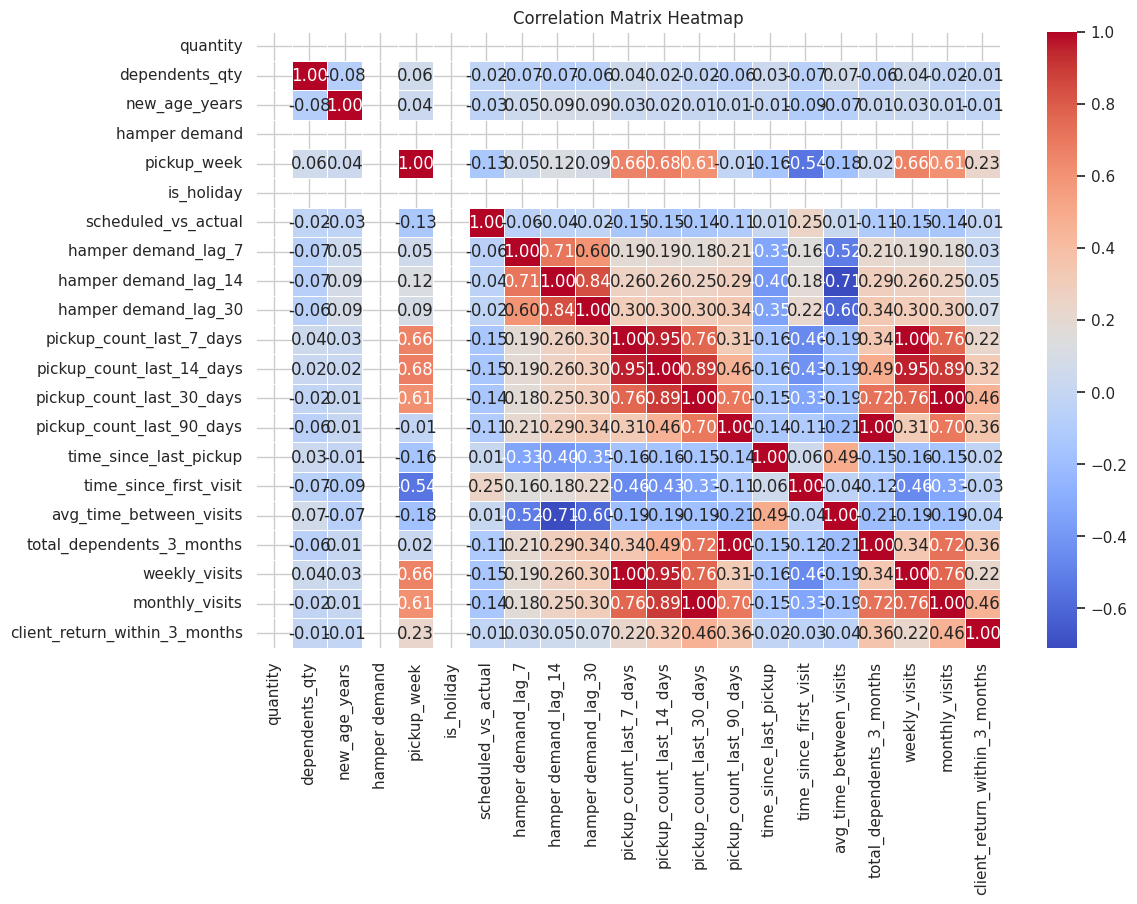

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Add labels and title
plt.title("Correlation Matrix Heatmap")
plt.show()


 '' ccccScatter Plots: Using scatter plots to visually assess the relationships between key features and the target.

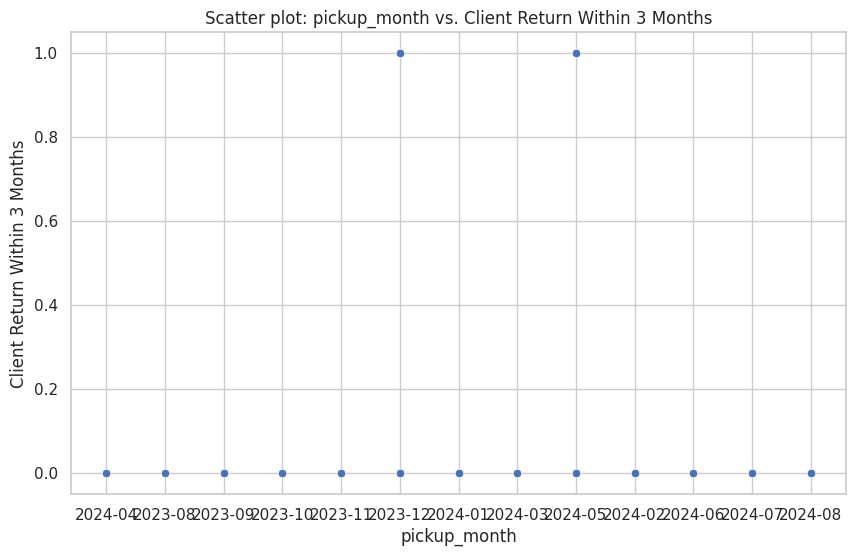

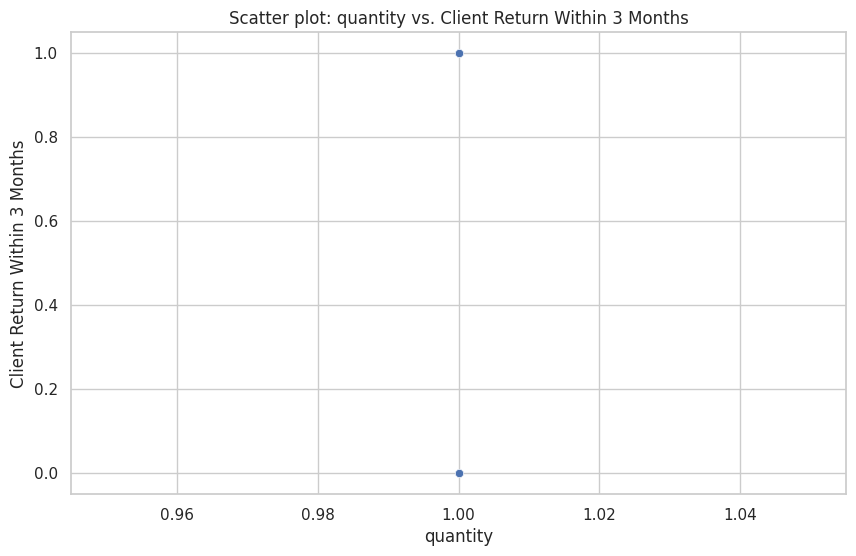

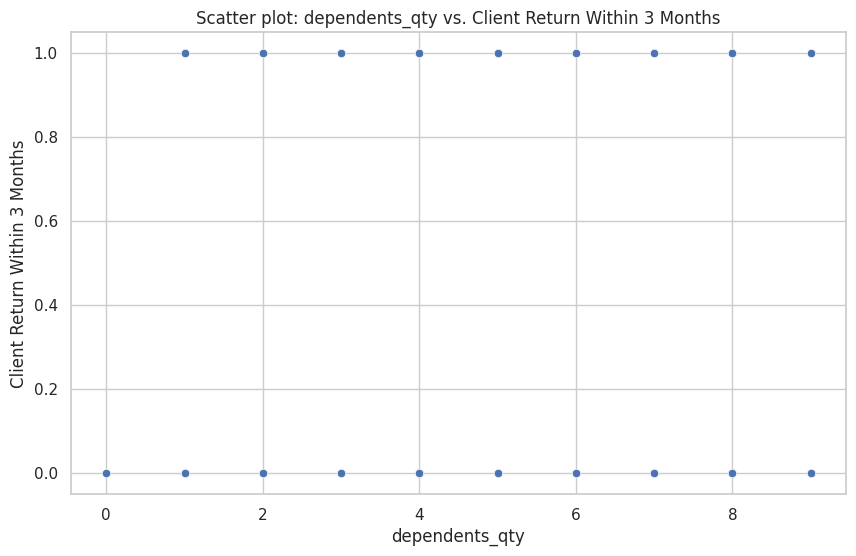

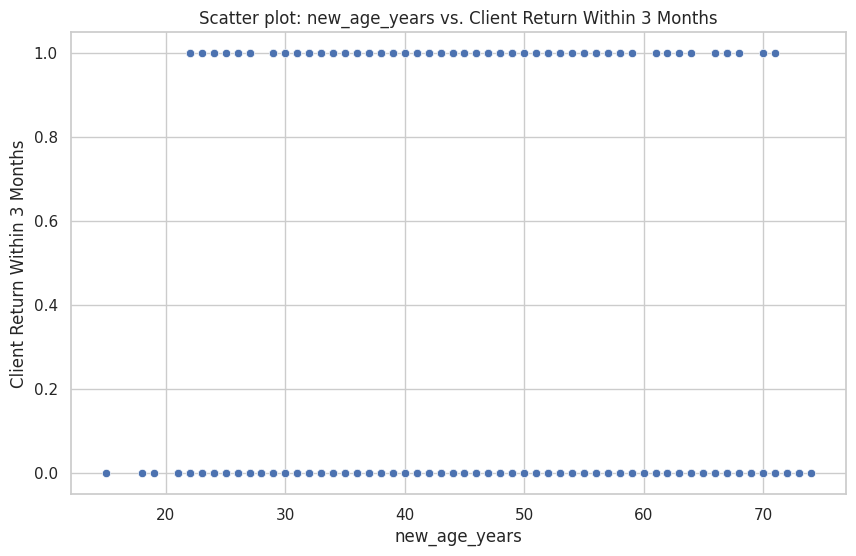

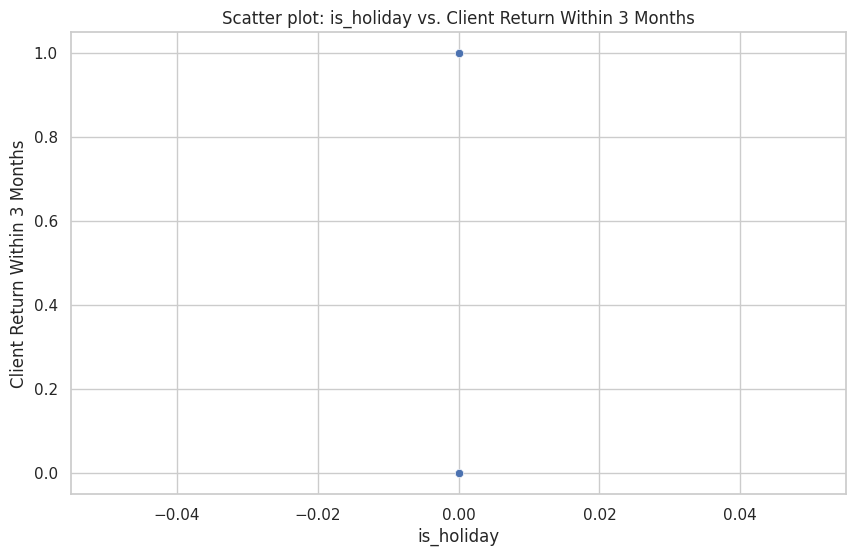

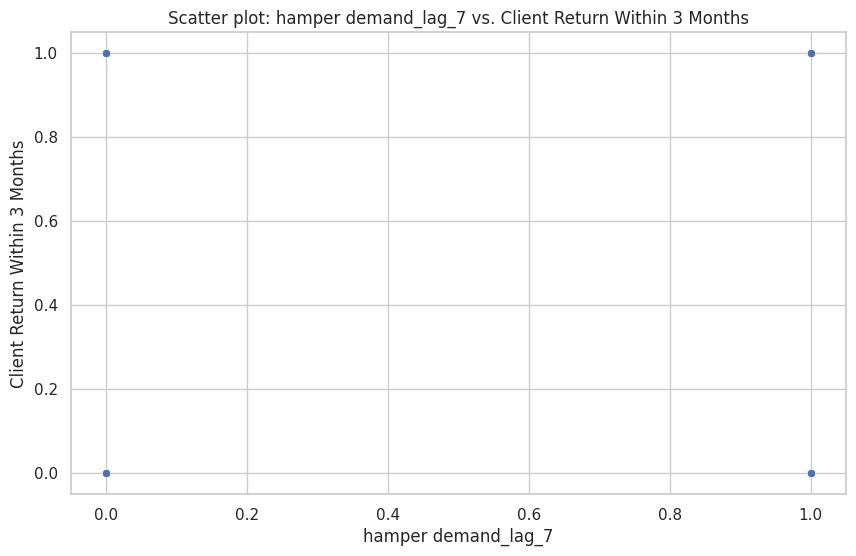

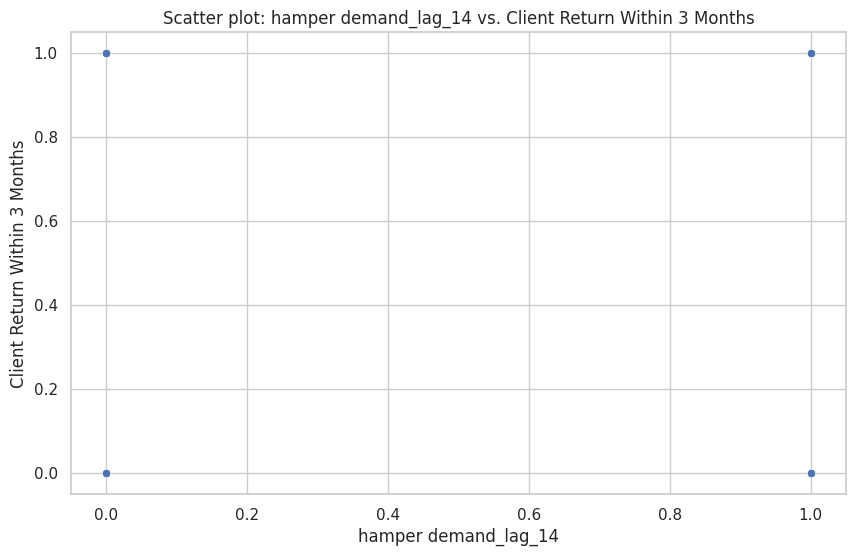

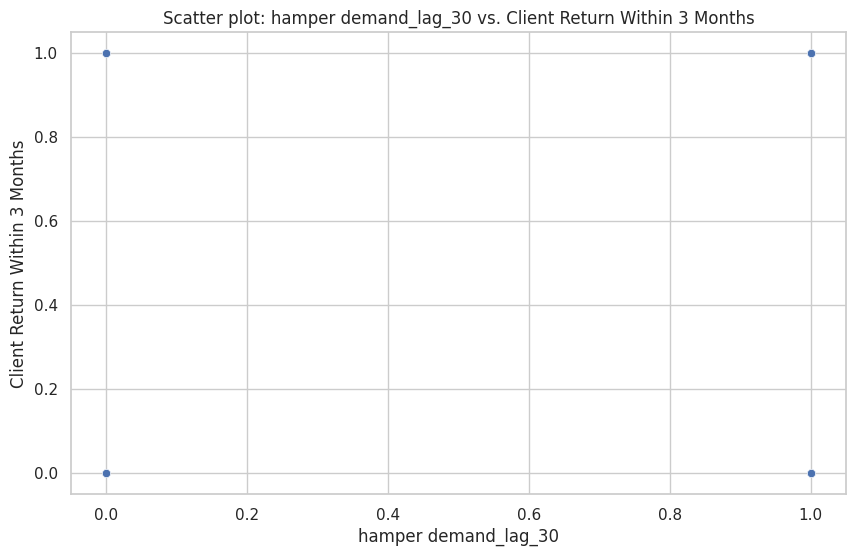

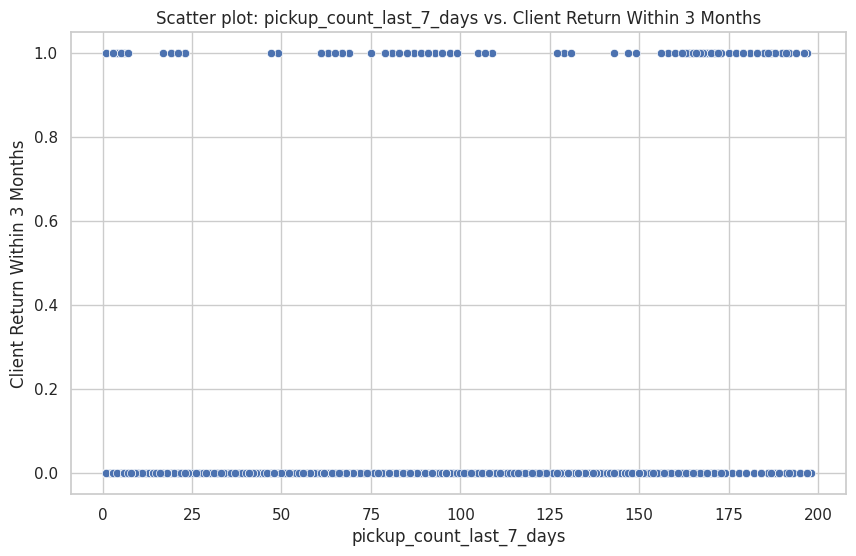

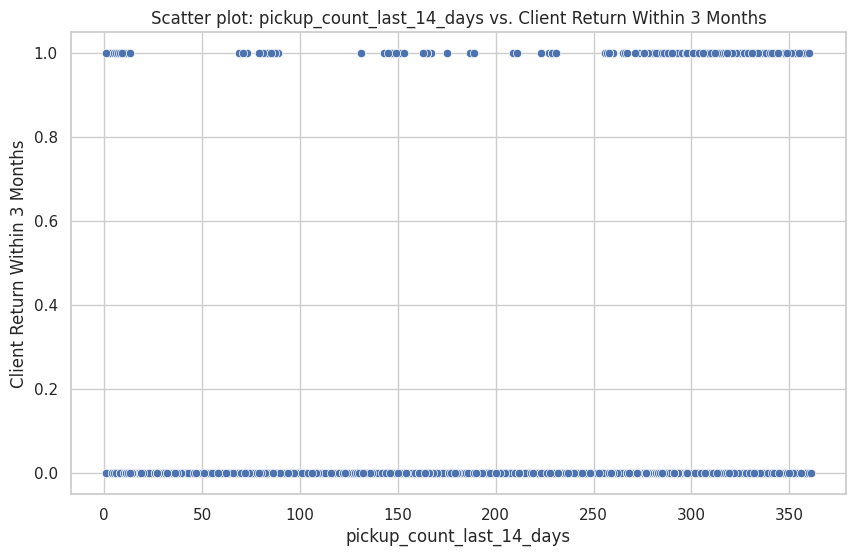

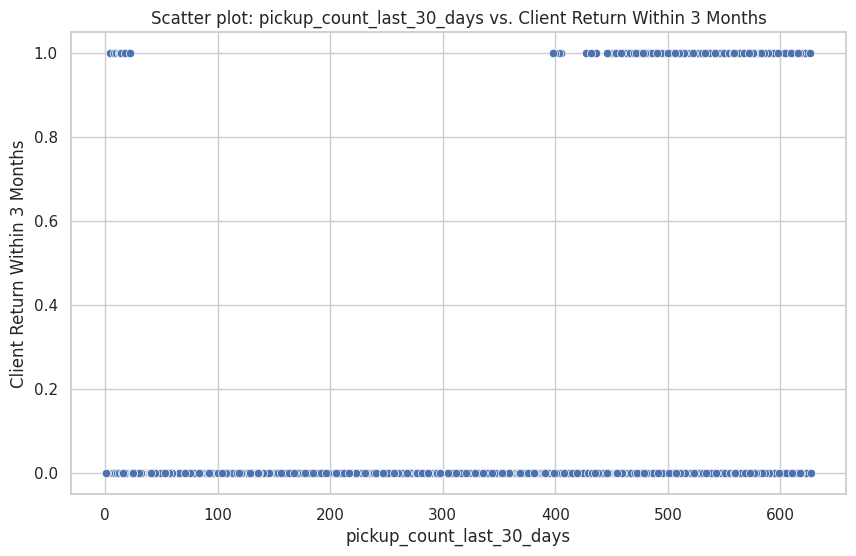

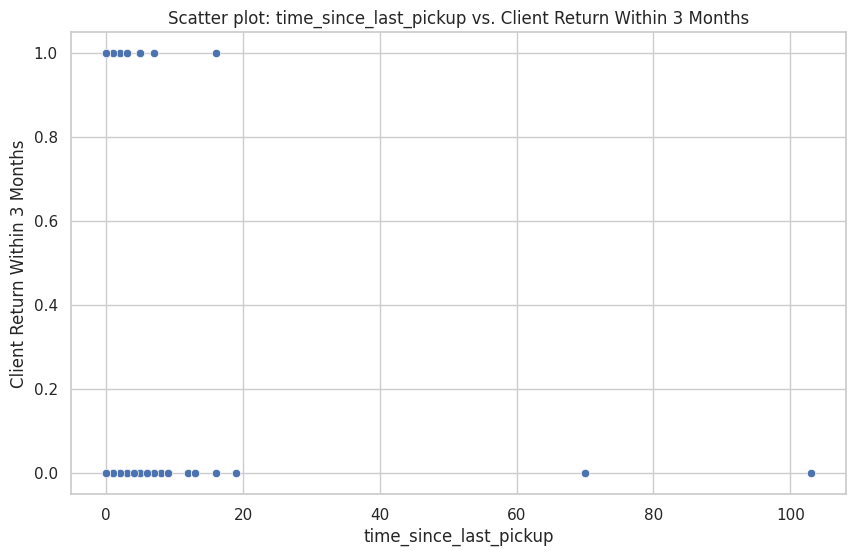

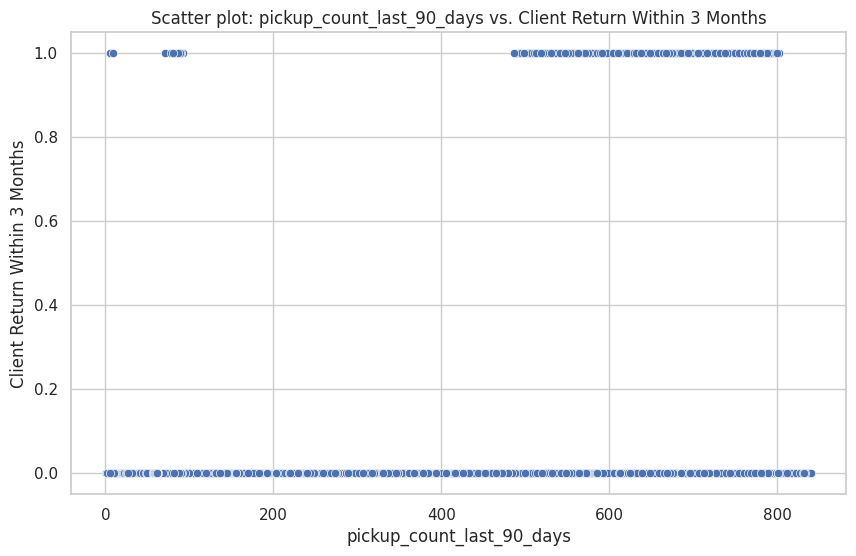

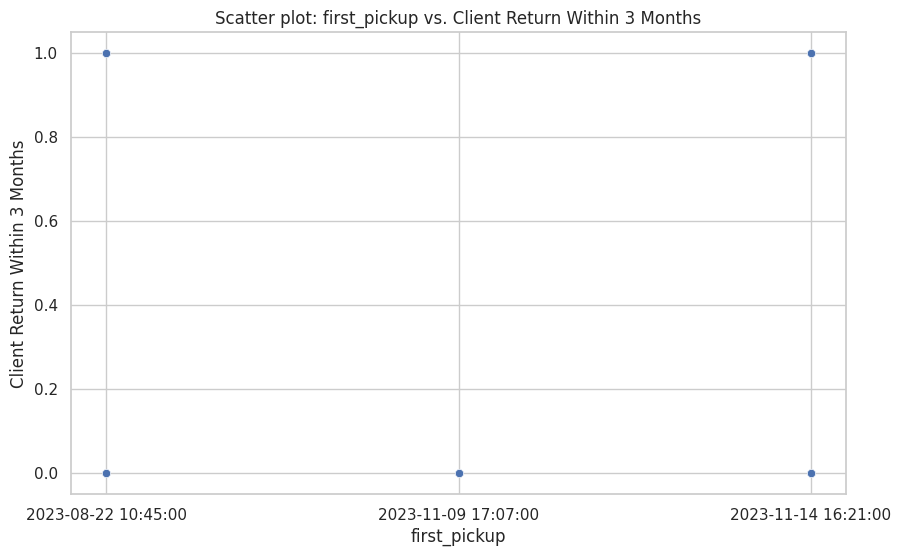

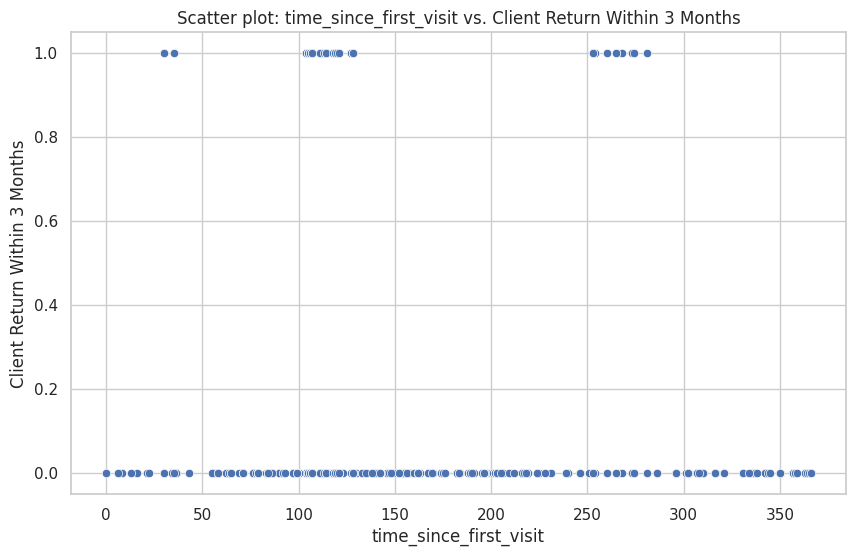

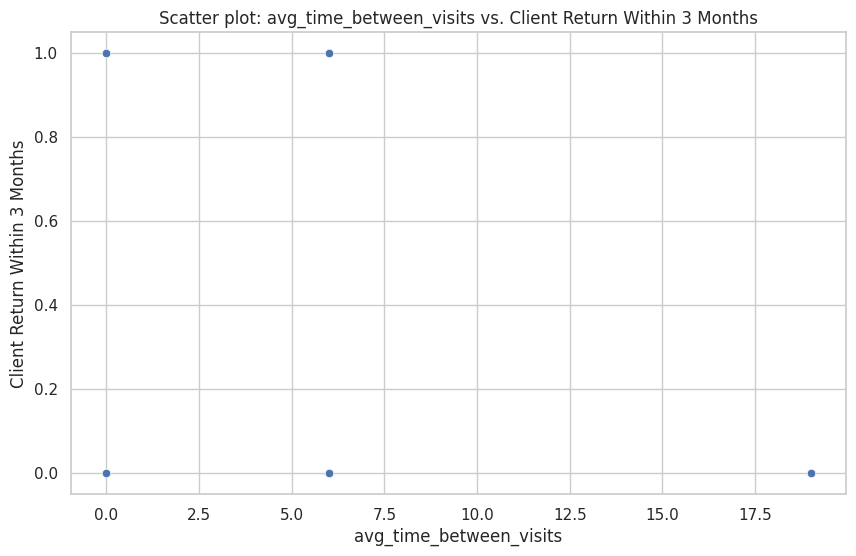

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# List of relevant features to examine the relationship with the target
features_to_plot = [
    'pickup_month', 'quantity', 'dependents_qty', 'new_age_years',
    'is_holiday', 'hamper demand_lag_7', 'hamper demand_lag_14', 'hamper demand_lag_30',
    'pickup_count_last_7_days', 'pickup_count_last_14_days', 'pickup_count_last_30_days',
    'time_since_last_pickup', 'pickup_count_last_90_days' , 'first_pickup', 'time_since_first_visit',
    'avg_time_between_visits'
]

# Create scatter plots for each feature
for feature in features_to_plot:
    plt.figure(figsize=(10, 6))
    # Convert 'pickup_month' to string if it's a Period object
    if feature == 'pickup_month':
        sns.scatterplot(x=df_merged[feature].astype(str), y=df_merged['client_return_within_3_months'])
    elif feature == 'first_pickup':
        sns.scatterplot(x=df_merged[feature].astype(str), y=df_merged['client_return_within_3_months'])
    #For any other date feature you can add an elif and follow the same procedure
    else:
        sns.scatterplot(x=df_merged[feature], y=df_merged['client_return_within_3_months'])

    plt.title(f'Scatter plot: {feature} vs. Client Return Within 3 Months')
    plt.xlabel(feature)
    plt.ylabel('Client Return Within 3 Months')
    plt.show()

In [ ]:
df_merged.shape

(1070, 54)

In [ ]:
# reset index
df_merged.reset_index(drop=True, inplace=True)

In [ ]:
df_merged.head(5)

,pickup_date,agent_collect_note,client_collected,client_list,collect_scheduled_date,confirmed,datetime_from,datetime_to,hamper_confirmation_type,hamper_type,quantity,title,Creation Date_x,Modified Date_x,address,client_status_more_info,contact_frequency,date_reopened,dependents_qty,household,latest_contact_method,preferred_contact_methods,preferred_languages,sex_new,status,Creation Date_y,Modified Date_y,new_age_years,preferred_languages_binned,hamper demand,pickup_month,Holidays,Dates,holiday_month,pickup_week,is_holiday,scheduled_vs_actual,hamper demand_lag_7,hamper demand_lag_14,hamper demand_lag_30,pickup_count_last_7_days,pickup_count_last_14_days,pickup_count_last_30_days,pickup_count_last_90_days,time_since_last_pickup,first_pickup,time_since_first_visit,avg_time_between_visits,total_dependents_3_months,weekly_visits,monthly_visits,client_return_within_3_months,postal_code,neighborhood
0,2024-04-19 00:22:00,"Said delivered the hamper on April 18, 2024.",yes,1669658091582x874637848970788900,2024-04-18 03:00:00,Unknown,2024-04-18 03:00:00,2024-04-18 03:00:00,Photo,1689345897790x875227980928652300,1,Food Hamper,2024-04-19 00:21:00,2024-04-19 00:22:00,"13439 97 St NW Unit 607, Edmonton, AB T5E 4C7,...",No notes,Unknown,NaT,1.0,yes,Unknown,Unknown,English,Female,Active,2022-11-28 14:54:00,2024-08-22 13:20:00,38,English,1,2024-04,Easter Monday,2024-04-01,2024-04,16,0,0,1.0,1.0,1.0,2.0,3.0,16.0,107.0,1.0,2023-08-22 10:45:00,240,0,353.0,2.0,16.0,0,T5E 4C7,Abbotsfield
1,2024-04-09 17:35:00,No Note,yes,1686780032991x462370984017264640,2024-04-09 03:00:00,Unknown,2024-04-09 03:00:00,2024-04-09 03:00:00,Photo,1689345897790x875227980928652300,1,Food Hamper,2024-04-09 17:35:00,2024-04-09 17:35:00,Unknown,No notes,Unknown,2023-10-04 17:20:00,1.0,yes,SMS,"SMS , Phone Call",Arabic,Unknown,Active,2023-06-14 19:00:00,2024-08-22 12:42:00,40,Arabic,1,2024-04,Easter Monday,2024-04-01,2024-04,15,0,0,1.0,1.0,1.0,3.0,8.0,31.0,125.0,5.0,2023-08-22 10:45:00,231,0,404.0,3.0,31.0,0,NaN,Unknown
2,2023-08-22 10:45:00,Pedro's test,yes,1689345689019x623399745786478600,2023-08-22 00:00:00,Unknown,2023-08-22 00:00:00,NaT,Personal ID,1689345897790x875227980928652300,1,Raj (Pedro's whatsapp) New Hamper,2023-08-22 09:59:00,2024-02-19 10:32:00,"10545 108 St NW, Edmonton, AB T5H 2Z8, Canada",No notes,Weekly,2023-10-04 17:20:00,1.0,yes,WhatsApp,"WhatsApp , SMS",English,Unknown,Active,2023-07-14 11:41:00,2024-08-22 13:21:00,38,English,1,2023-08,Heritage Day,2023-08-07,2023-08,34,0,0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,NaN,2023-08-22 10:45:00,0,0,1.0,1.0,1.0,0,T5H 2Z8,Central McDougall
3,2023-09-07 17:37:00,Confirmed pickup.,yes,1694115474357x134699341188431870,2023-09-07 03:00:00,Unknown,2023-09-07 03:00:00,2023-09-07 03:00:00,Personal ID,1689345897790x875227980928652300,1,Abdulhalim's Hamper,2023-09-07 17:36:00,2024-02-19 10:32:00,"14604 77 St NW, Edmonton, AB T5C 1E8, Canada",No notes,Monthly,2023-09-07 18:25:00,6.0,yes,WhatsApp,"WhatsApp , Phone Call",Arabic,Unknown,Active,2023-09-07 16:37:00,2024-08-22 12:31:00,37,Arabic,1,2023-09,Labour Day,2023-09-04,2023-09,36,0,0,0.0,0.0,0.0,1.0,1.0,2.0,2.0,16.0,2023-08-22 10:45:00,16,0,7.0,1.0,2.0,0,T5C 1E8,Kilkenny
4,2023-09-12 17:39:00,No Note,yes,1694547419532x515953499649605600,2023-09-12 03:00:00,Unknown,2023-09-12 03:00:00,2023-09-12 03:00:00,Personal ID,1689345897790x875227980928652300,1,Sadek's Hamper,2023-09-12 17:33:00,2024-02-19 10:32:00,"403 Callaghan Ct SW, Edmonton, AB T6W 0G6, Canada",No notes,Monthly,2023-10-04 17:20:00,5.0,yes,Unknown,"SMS , Phone Call , Email","Arabic , French",Unknown,Active,2023-09-12 16:36:00,2024-08-22 12:02:00,34,"Arabic , French",1,2023-09,Labour Day,2023-09-04,2023-09,37,0,0,0.0,0.0,0.0,2.0,2.0,3.0,3.0,5.0,2023-08-22 10:45:00,21,0,12.0,2.0,3.0,0,T6W 0G6,Callaghan


In [ ]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 54 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   pickup_date                    1070 non-null   datetime64[ns]
 1   agent_collect_note             1070 non-null   category      
 2   client_collected               1070 non-null   category      
 3   client_list                    1070 non-null   category      
 4   collect_scheduled_date         1070 non-null   datetime64[ns]
 5   confirmed                      1070 non-null   category      
 6   datetime_from                  1070 non-null   datetime64[ns]
 7   datetime_to                    1068 non-null   datetime64[ns]
 8   hamper_confirmation_type       1070 non-null   category      
 9   hamper_type                    1070 non-null   category      
 10  quantity                       1070 non-null   int64         
 11  title            

In [ ]:
df_merged.columns

Index(['pickup_date', 'agent_collect_note', 'client_collected', 'client_list',
       'collect_scheduled_date', 'confirmed', 'datetime_from', 'datetime_to',
       'hamper_confirmation_type', 'hamper_type', 'quantity', 'title',
       'Creation Date_x', 'Modified Date_x', 'address',
       'client_status_more_info', 'contact_frequency', 'date_reopened',
       'dependents_qty', 'household', 'latest_contact_method',
       'preferred_contact_methods', 'preferred_languages', 'sex_new', 'status',
       'Creation Date_y', 'Modified Date_y', 'new_age_years',
       'preferred_languages_binned', 'hamper demand', 'pickup_month',
       'Holidays', 'Dates', 'holiday_month', 'pickup_week', 'is_holiday',
       'scheduled_vs_actual', 'hamper demand_lag_7', 'hamper demand_lag_14',
       'hamper demand_lag_30', 'pickup_count_last_7_days',
       'pickup_count_last_14_days', 'pickup_count_last_30_days',
       'pickup_count_last_90_days', 'time_since_last_pickup', 'first_pickup',
       'time_sin

In [ ]:
df_merged.nunique()

,0
pickup_date,837
agent_collect_note,233
client_collected,1
client_list,892
collect_scheduled_date,151
confirmed,3
datetime_from,151
datetime_to,149
hamper_confirmation_type,4
hamper_type,2


In [ ]:

df_merged['client_return_within_3_months'].unique()

array([0, 1])

In [ ]:
# remove features used in feature engineering and other irrelevant features
df_merged = df_merged.drop(columns=['pickup_date', 'agent_collect_note', 'client_collected', 'quantity', 'client_list', 'Creation Date_x', 'Modified Date_x', 'address', 'client_status_more_info', 'date_reopened',
                   'preferred_contact_methods', 'preferred_languages', 'Creation Date_y', 'Modified Date_y', 'hamper demand', 'is_holiday', 'first_pickup', 'datetime_from', 'datetime_to', 'Dates'])

##Feature Selection
**Using the Chi-test technique, we will be selecting features that are most relevant for our classification task. The features that return lowest p-values will be retained.**

In [ ]:
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
import numpy as np # Import numpy


X = df_merged.drop('client_return_within_3_months', axis=1)  # Features
y = df_merged['client_return_within_3_months']  # Target

# Handle NaT and NaN values before encoding
# Replace NaT with a specific date or a placeholder, and NaN with a numerical placeholder
for col in X.select_dtypes(include=['datetime64']).columns:
    X[col] = X[col].fillna(pd.to_datetime('1900-01-01'))  # Replace NaT with '1900-01-01'

# Impute NaN values in numerical and categorical columns
for col in X.select_dtypes(include=['number', 'object', 'category']).columns:
    if X[col].isnull().any():  # Check if column has missing values
        if pd.api.types.is_numeric_dtype(X[col]):
            X[col] = X[col].fillna(X[col].median())  # Impute numerical with median
        else:
            X[col] = X[col].fillna(X[col].mode()[0])  # Impute categorical with mode


# Convert categorical features to numerical using OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1) # Handle unknown with -1
X_encoded = encoder.fit_transform(X) # Fit and transform X

# Chi-squared test
chi_scores = chi2(X_encoded, y) # Use encoded X for chi2 test
p_values = pd.Series(chi_scores[1], index=X.columns)
p_values.sort_values(ascending=True, inplace=True)
print(p_values)  # Features with lower p-values are more important

monthly_visits                0.000000e+00
weekly_visits                 0.000000e+00
total_dependents_3_months     0.000000e+00
pickup_count_last_90_days     0.000000e+00
pickup_count_last_30_days     0.000000e+00
pickup_count_last_14_days     0.000000e+00
pickup_count_last_7_days      0.000000e+00
Holidays                      8.394089e-90
pickup_week                   1.064300e-69
postal_code                   2.397603e-16
title                         2.679551e-05
time_since_first_visit        7.845354e-04
collect_scheduled_date        4.075816e-03
preferred_languages_binned    9.667010e-02
avg_time_between_visits       1.207797e-01
confirmed                     1.577654e-01
neighborhood                  1.655610e-01
scheduled_vs_actual           1.669720e-01
time_since_last_pickup        1.826097e-01
hamper_confirmation_type      1.983086e-01
status                        2.111968e-01
sex_new                       3.572870e-01
new_age_years                 4.533795e-01
hamper dema

In [ ]:
# create new dataframe with relevant features
churn_df = df_merged.drop(columns=['preferred_languages_binned', 'avg_time_between_visits', 'confirmed',
                   'neighborhood', 'scheduled_vs_actual', 'time_since_last_pickup', 'hamper_confirmation_type', 'status',
                                   'sex_new', 'new_age_years', 'hamper_type', 'latest_contact_method',
                                   'hamper demand_lag_7', 'hamper demand_lag_14', 'dependents_qty', 'household', 'contact_frequency',
                                   'holiday_month', 'pickup_month','hamper demand_lag_30', 'collect_scheduled_date'
                                ])

# checking the shape of churn_df
churn_df.shape

(1070, 13)

In [ ]:
# listing columns for churn_df
churn_df.columns

Index(['title', 'Holidays', 'pickup_week', 'pickup_count_last_7_days',
       'pickup_count_last_14_days', 'pickup_count_last_30_days',
       'pickup_count_last_90_days', 'time_since_first_visit',
       'total_dependents_3_months', 'weekly_visits', 'monthly_visits',
       'client_return_within_3_months', 'postal_code'],
      dtype='object')

In [ ]:
#  export churn dataframe
churn_df.to_csv('churn_df.csv', index=False)
